In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sympy import *  # can be installed with pip install sympy or you can use google colab
init_printing()

In [2]:
x = Function('x')
t = symbols('t', real=True)
ω = symbols('omega', real=True, positive=True)

### Solve the simple harmonic oscillator equation symbolically!

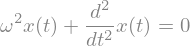

In [3]:
eq = Eq(x(t).diff(t, t) + ω**2 * x(t), 0)
eq

In [4]:
# Define some sympy variables 
x0, v0 = symbols('x_0, v_0')

# define the initial conditions
initial = {
    x0 : 1,
    v0 : 0    
}

sol = dsolve(eq, x(t)).simplify()  # solve the symbolic equation
sol

In [5]:
# Get the C1 and C2 constants, and set x(0) and x_dot(0)

consts = sol.atoms(Symbol).difference(eq.atoms(Symbol))
consts
C1, C2 = sorted(consts, key=lambda c: str(c))

# Set C1 and C2 based on x0 and v0 variables
ic1 = Eq(sol.subs(t, 0).rhs, x0)
ic2 = Eq(sol.rhs.diff(t).subs(t, 0), v0)
ic1, ic2

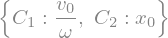

In [6]:
# Solve for C1 and C2

coefs = solve([ic1, ic2], {C1, C2})
coefs

In [7]:
# Plug in the initial values for x0 and v0 to get final solution

sol_free = sol.subs(coefs).subs(initial).simplify()
sol_free

### What if the frequency is complex and we start with finite velocity?

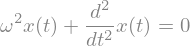

In [8]:
# New initial condition
initial = {
    x0 : 1,
    v0 : 1    
}

x = Function('x')
t = symbols('t', real=True)
ω = symbols('omega', real=False, positive=False)  # set omega to be complex here
eq = Eq(x(t).diff(t, t) + ω**2 * x(t), 0)
eq

### TODO:
1. Solve updated problem in sympy
2. Plot the solution with values such as $\omega = 1 - i$ or $\omega = 1 - 0.1i$. What do you observe? Can you connect this to the discussion in Problem 1?
3. Try out different initial conditions and different values for $\omega$!

### Okay back to real frequencies, but now let's use the damped simple harmonic oscillator equation

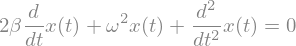

In [9]:
β = symbols('beta', real=True, positive=True)
ω = symbols('omega', real=True, positive=True)
eq = Eq(x(t).diff(t, t) + 2*β*x(t).diff(t) + ω**2 * x(t), 0)
eq

### TODO: 
Talk amongst your group -- what do each of these terms represent physically? From this, can you conclude about the dynamical behavior in various limits such as $\beta \to 0$, $\beta\to\infty$, $\omega\to 0$? 

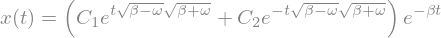

In [10]:
sol = dsolve(eq, x(t)).simplify()  # solve the ODE
sol

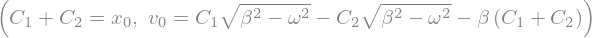

In [11]:
# Set up equations relating C1, C2 to x0, v0

ini1 = Eq(sol.subs(t, 0).rhs, x0)
ini2 = Eq(sol.rhs.diff(t).subs(t, 0), v0).simplify()
ini1, ini2

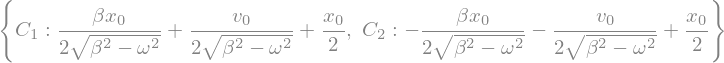

In [12]:
# Solve for C1 and C2

coefs = solve([ini1, ini2], {C1, C2})
coefs

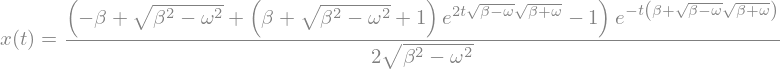

In [13]:
# Solve the ODE with the specified initial condition

sol_fric = sol.subs(coefs).subs(initial).simplify()
sol_fric

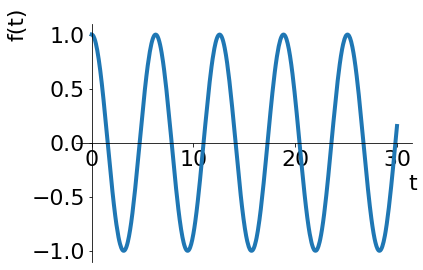

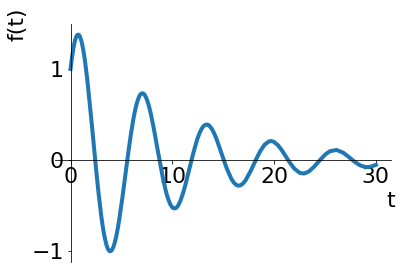

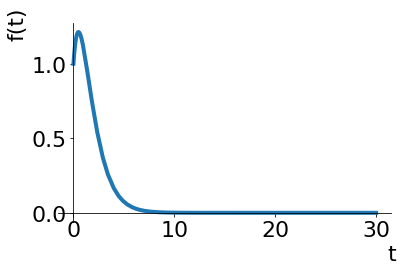

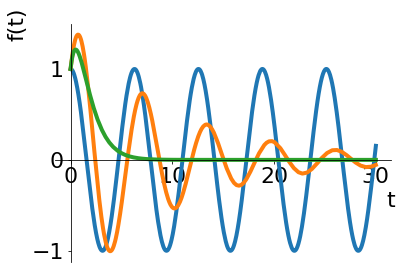

In [14]:
plt.rcParams['font.size'] = 22
plt.rcParams['lines.linewidth'] = 4
p = plot(sol_free.rhs.subs(ω, 1), (t, 0, 30))
p2 = plot(sol_fric.rhs.subs({ω: 1, β: 0.1}), (t, 0, 30))
p3 = plot(sol_fric.rhs.subs({ω: 1, β: 0.99999999}), (t, 0, 30))
p.extend(p2)
p.extend(p3)
p.show()

### TODO: 
1. Extend this example for $\beta = \omega$. Do you still get oscillatory behavior? What is going here?
2. Compare these results with your initial intuitions. Were you correct?

### Damped harmonic oscillator with a sinusoidal forcing term

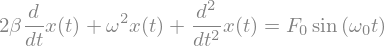

In [15]:
F0 = symbols('F_0', real=True)
ω0 = symbols('omega_0', real=True, positive=True)
eq = Eq(x(t).diff(t, t) + 2*β*x(t).diff(t) + ω**2 * x(t),
        F0 * sin(ω0 * t))
eq

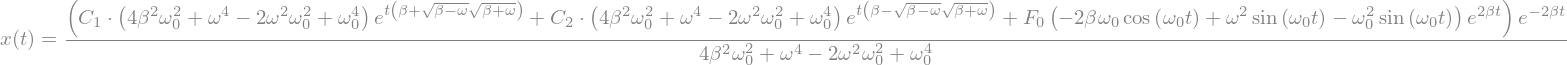

In [16]:
sol = dsolve(eq, x(t)).simplify()  # This solution will take longer to compute
sol

### Quick Note
For those of you who remember your ODEs well, you can see above that the solution is a sum of the homogeneous solution (in terms of the exponentials) and particular solution (depending on the Forcing term).

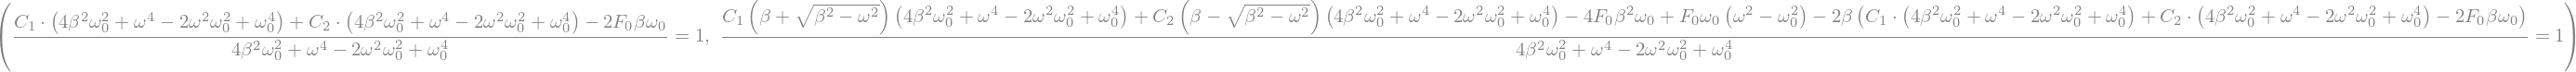

In [17]:
# The equations between C1, C2 and x0, v0 are getting complicated!

ini1 = Eq(sol.rhs.subs(t, 0), x0).subs(initial).simplify()
ini2 = Eq(sol.rhs.diff(t).subs(t, 0), v0).subs(initial).simplify()
ini1, ini2

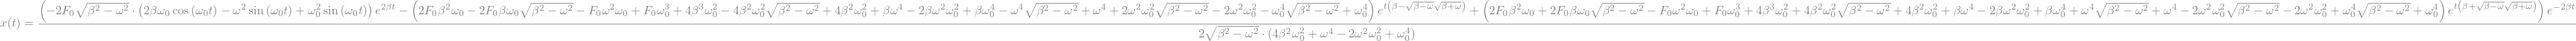

In [18]:
# Still an algebraic set of equations, so can solve these for C1 and C2

coefs = solve([ini1, ini2], {C1, C2})
sol_driven = sol.subs(coefs).simplify()  # solve the ODE with these coefficients
sol_driven

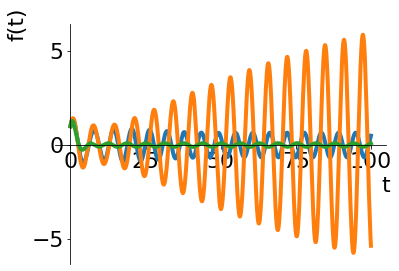

In [19]:
p4 = plot(sol_driven.rhs.subs({ω:1, β:0.1, ω0: 1.1, F0: 0.2}), 
          (t, 0, 100), show=False)
p5 = plot(sol_driven.rhs.subs({ω:1, β:0.01, ω0: 1, F0: 0.2}), 
          (t, 0, 100), show=False)
p6 = plot(sol_driven.rhs.subs({ω:1, β:0.5, ω0: 1, F0: -0.1}), 
          (t, 0, 100), show=False)
p4.extend(p5)
p4.extend(p6)
p4.show()

### TODO: 
1. What happens if $\beta = \omega$? 
2. What if $\omega = \omega_0$? 
3. What if $F_0$ is very large? Does the solution diverge at large times? Why or why not?
4. What if $F(t) = F_0 t$? How are the solution behaviors changed and why?

### TODO:
Want to try symbolically using the power series method in the *nonlinear* oscillator that has no analytic solution?
You can try and code up the last example in the notebook I have designed this notebook after 
https://medium.com/@mathcube7/solving-differential-equations-analytically-with-python-b2dea629d50f